# Student performance in exam
## by Ijaoba Abdulazeez 


## Investigation Overview

> In this investigation, i wanted to look at the students performance using the total mark of individual scores. The main focus was on the gender's performance and using the test preparation course , parents education level and race/ethnicity to understand their impact.
   * The distribution of the Total marks and pass status
   * The distriution of the gender : this will give us a picture of the number of males and females that took the exam
   * gender vs total mark: this will help reveal which gender passed or failed more
   * gender vs test_preparation_course: this relationship will give us an indept of whether it determined those that passed and those that didnt
   * race_ethnicity and total mark by gender
   * parents_education and total mark by gender

## Dataset Overview

> The dataset consist of 1000 students of different genders and ethnicity. The attributes in the data are the genders, parents education, test preparation course, lunch, the 3 examination scores. Then an extra two columns was generated which are the Total mark and pass status to defermine theri performance.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
exams = pd.read_csv('exams.csv')
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
exam= exams.rename(columns = {"race/ethnicity":"race_ethnicity","parental level of education":"parent_education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})
exam.head(5)

In [7]:
# creating new a new column and including the total scores
exam['Total_mark'] = exam['math_score'] + exam['reading_score'] + exam['writing_score']
print(exam)
exam.head(10)

     gender race_ethnicity    parent_education         lunch  \
0      male        group A         high school      standard   
1    female        group D    some high school  free/reduced   
2      male        group E        some college  free/reduced   
3      male        group B         high school      standard   
4      male        group E  associate's degree      standard   
..      ...            ...                 ...           ...   
995    male        group C         high school      standard   
996    male        group D  associate's degree  free/reduced   
997  female        group C    some high school  free/reduced   
998  female        group C        some college      standard   
999    male        group A        some college      standard   

    test_preparation_course  math_score  reading_score  writing_score  \
0                 completed          67             67             63   
1                      none          40             59             55   
2           

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_mark
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219
5,female,group D,high school,standard,none,63,77,76,216
6,female,group A,bachelor's degree,standard,none,62,59,63,184
7,male,group E,some college,standard,completed,93,88,84,265
8,male,group D,high school,standard,none,63,56,65,184
9,male,group C,some college,free/reduced,none,47,42,45,134


In [8]:
#checking the total count for both pass and failed students
passmark = 150  #150 is the passmark
exam['Pass_status'] = np.where(exam['Total_mark'] < passmark, 'Fail', 'Pass')
pass_count= exam.Pass_status.value_counts()
pass_count

Pass    876
Fail    124
Name: Pass_status, dtype: int64

In [9]:
exam.sample()

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_mark,Pass_status
663,female,group C,some college,standard,completed,63,78,75,216,Pass


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The distribution of Total mark

>The total mark in the dataset has values ranging from 65 to 300. we can see that majority of the mark rise above average, few are below average and just two long peaks are between above 150 and 250 which indicates that most student scored between that range. 


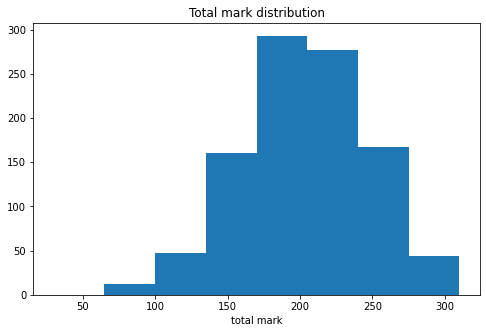

In [38]:
binsize = 35
bins = np.arange(30, exam['Total_mark'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = exam, x = 'Total_mark', bins = bins)
plt.xlabel('total mark')
plt.title('Total mark distribution')
plt.show()

## Distribution of Gender

>we can see that the ratio of male to female is almost the same just some difference but still, there are more male students than female.

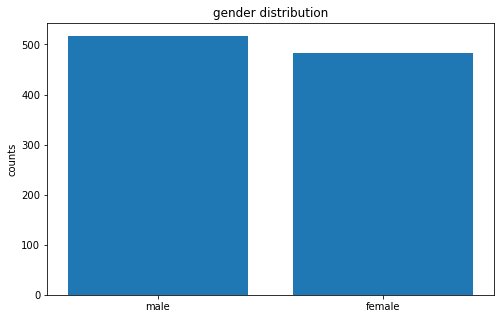

In [10]:
# lets look at only the gender distribution differently
x= exam['gender'].unique()
y = exam['gender'].value_counts()
plt.figure(figsize =[8,5])
plt.bar(x,y)
plt.ylabel('counts')
plt.title('gender distribution');

## Gender vs Total mark

> using a boxplot to check their level of performance. we can see that the first quarter of the females performance is more t than the males with their first quarters below 250 even though there are more males than females.

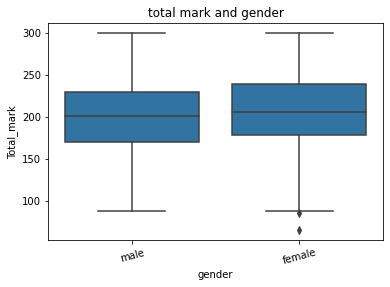

In [11]:
base_color = sb.color_palette()[0]
sb.boxplot(data=exam, x = 'gender', y ='Total_mark', color=base_color )
plt.xticks(rotation = 15)
plt.title('total mark and gender');

## Gender vs Pass status

> > we can see that even though females got high marks than males,in this plot, male failed compared to female. but the males also slight passed too. but since the proportion of failed is low compared to males, it means fenale performed well 

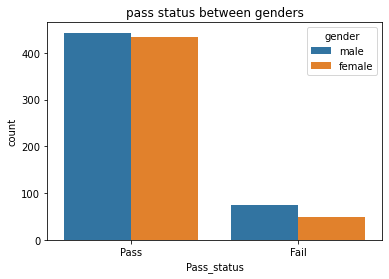

In [12]:
sb.countplot(data = exam, x='Pass_status', hue = 'gender')
plt.title('pass status between genders');

## Gender vs test preparation course

> this plot shows that people who completed their test_prepparation got high marks than those who didnt. this clearly shows that the test_preparation course was really effective


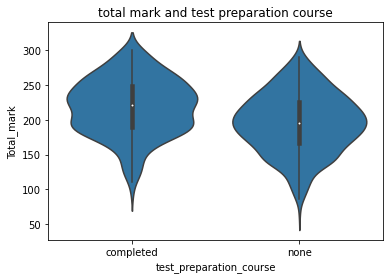

In [13]:
sb.violinplot(data = exam, x ='test_preparation_course', y = 'Total_mark', color= base_color)
plt.title('total mark and test preparation course');

## Race_ethnicity and Total mark by gender

> we can see that the males and females in group E performed well, but males had higher marks than the females. but majority of females in group D in terms of median score did better than the male. so based on race_ethnicity, we can say that males performed well than the females.

<Figure size 1008x576 with 0 Axes>

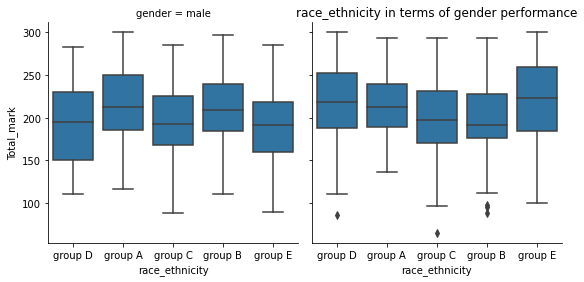

In [27]:
plt.figure(figsize =[14,8])
g= sb.FacetGrid(data = exam, col = 'gender',height = 4)
g.map(sb.boxplot, 'race_ethnicity', 'Total_mark')
plt.title('race_ethnicity in terms of gender performance');


## Parent education and Total mark by gender

> we can see in this plot that the parents with bachelors degree and masters degree have the highest well performed students. but the males for the parents with masters degree seem quite low, while the female did excellently well. Based on this gender comparism, we can now conclude that females performed far better than males.

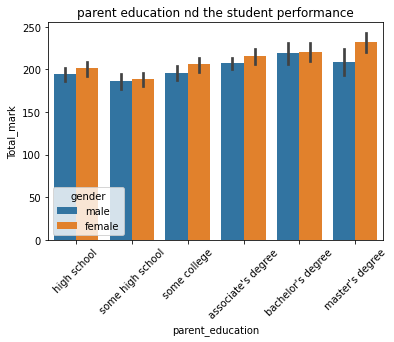

In [20]:
ax = sb.barplot(data = exam, x = 'parent_education', y = 'Total_mark', hue ='gender', dodge = 0.5 , )
plt.xticks(rotation = 45)
plt.title('parent education nd the student performance');

In [1]:
!jupyter nbconvert student_exam_presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook student_exam_presentation.ipynb to slides
[NbConvertApp] Writing 690090 bytes to student_exam_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\oluwaseyitan\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\envs\oluwaseyitan\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\envs\oluwaseyitan\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\envs\oluwaseyitan\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\envs\oluwaseyitan\lib\site-packages\nbconvert\nbconvertapp.py", line 54